In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart_failure.csv')

In [4]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [5]:
df.shape

(299, 13)

In [6]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
x = df.drop('DEATH_EVENT',axis=1)

In [8]:
y = df['DEATH_EVENT']

In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

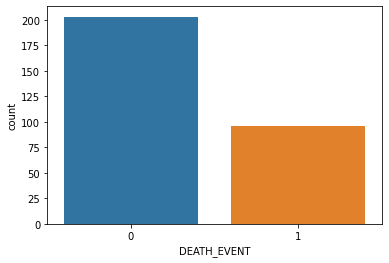

In [10]:
sns.countplot(x = 'DEATH_EVENT', data=df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

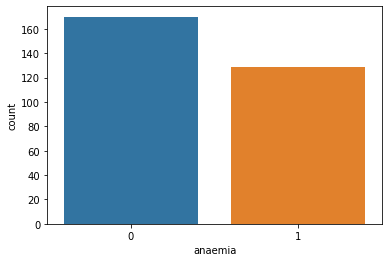

In [11]:
sns.countplot(x='anaemia',data=df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

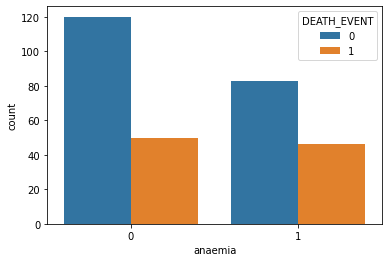

In [12]:
sns.countplot(x='anaemia',data=df,hue='DEATH_EVENT')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

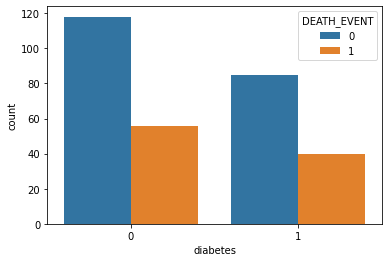

In [13]:
sns.countplot(x='diabetes',data=df,hue='DEATH_EVENT')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

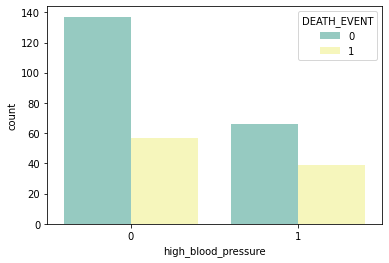

In [14]:
sns.countplot(x='high_blood_pressure',data=df,hue='DEATH_EVENT',palette="Set3")

<AxesSubplot:xlabel='count', ylabel='high_blood_pressure'>

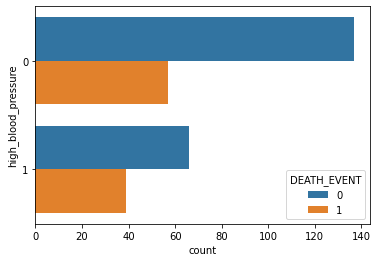

In [15]:
sns.countplot(y='high_blood_pressure',data=df,hue='DEATH_EVENT')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30) #shift + tab button

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dt = DecisionTreeClassifier()

In [20]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [21]:
xtest.shape

(90, 12)

In [22]:
xtrain.shape

(209, 12)

In [23]:
pred = dt.predict(xtest)

In [24]:
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [25]:
ytest

228    0
207    0
274    0
84     1
226    0
      ..
276    0
27     1
249    0
214    0
50     1
Name: DEATH_EVENT, Length: 90, dtype: int64

In [26]:
dt.score(xtest,ytest)

0.7444444444444445

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [28]:
confusion_matrix(ytest,pred)

array([[51, 14],
       [ 9, 16]], dtype=int64)

In [29]:
(62+12) / (62+12+7+9)

0.8222222222222222

In [30]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82        65
           1       0.53      0.64      0.58        25

    accuracy                           0.74        90
   macro avg       0.69      0.71      0.70        90
weighted avg       0.76      0.74      0.75        90



In [31]:
cm = confusion_matrix(ytest,pred)
cm

array([[51, 14],
       [ 9, 16]], dtype=int64)

In [32]:
features = x.columns #

<AxesSubplot:>

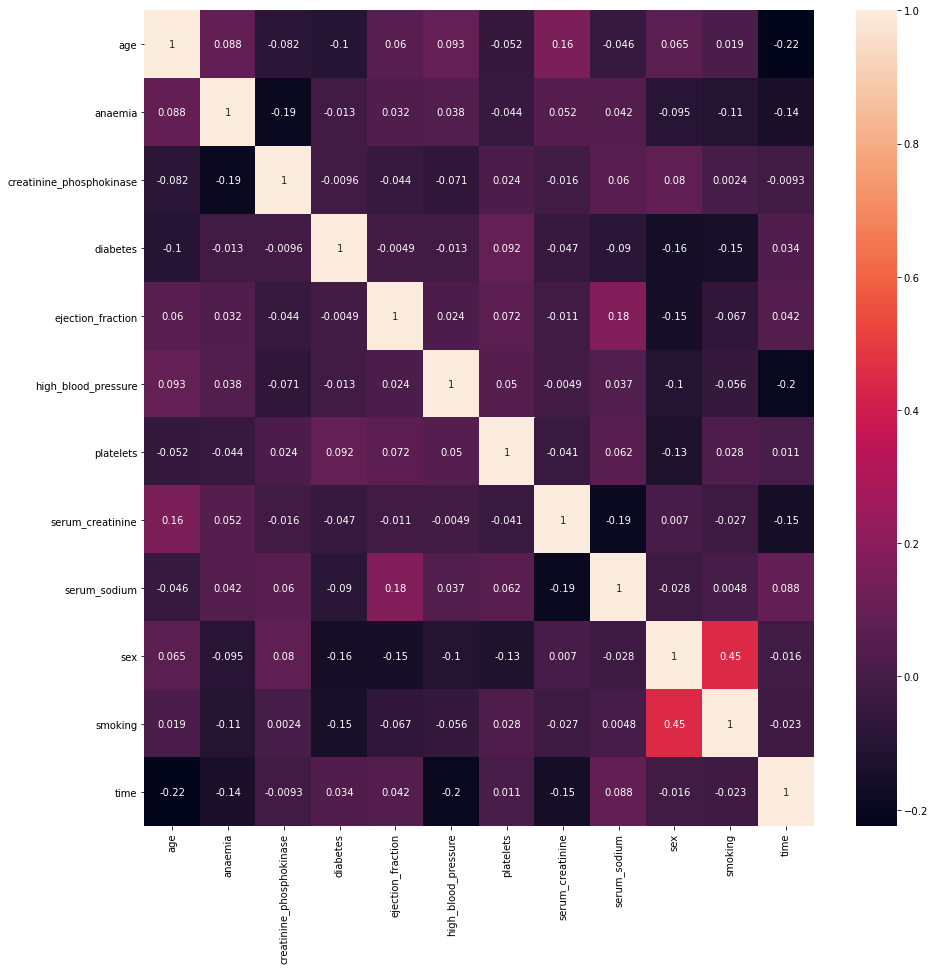

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(df[features].corr(),annot=True)

<AxesSubplot:>

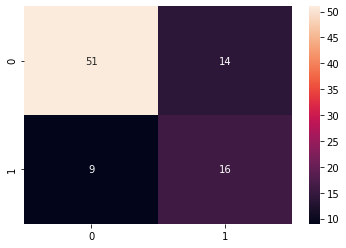

In [34]:
sns.heatmap(cm, annot=True)

In [35]:
accuracy_score(ytest,pred)

0.7444444444444445

# ROC

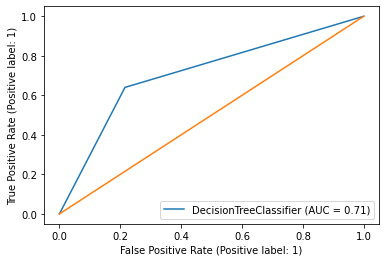

In [36]:
plot_roc_curve(dt,xtest,ytest)
plt.plot([0,1],[0,1])

In [37]:
from sklearn import tree
plt.figure(figsize=(15,15),dpi=1000)
tree.plot_tree(dt,filled=True,feature_names=features)

[Text(4836.830357142858, 10810.227272727272, 'time <= 67.5\ngini = 0.449\nsamples = 209\nvalue = [138, 71]'),
 Text(1328.5714285714287, 9780.681818181818, 'creatinine_phosphokinase <= 80.5\ngini = 0.226\nsamples = 54\nvalue = [7, 47]'),
 Text(664.2857142857143, 8751.136363636364, 'serum_sodium <= 134.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(332.14285714285717, 7721.590909090909, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(996.4285714285716, 7721.590909090909, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(1992.8571428571431, 8751.136363636364, 'ejection_fraction <= 71.0\ngini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(1660.7142857142858, 7721.590909090909, 'serum_creatinine <= 0.7\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(996.4285714285716, 6692.045454545455, 'anaemia <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(664.2857142857143, 5662.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(1328.5714285714287, 5662.5, 'gini = 0.0\nsamples